### Exercici 1
#### Resumeix gràficament el data set DelayedFlights.csv

In [29]:
import numpy as np #libreria para trabajar con matrices
import pandas as pd #librería para dataframes 
import matplotlib.pyplot as plt #librería gráfica
import seaborn as sns #librería gráfica avanzada basada en matplotlib

In [30]:
df_flight = pd.read_csv('DelayedFlights.csv', index_col=0) 
#lee el fichero CSV y asigna el índice a la columna 0


#### Crea almenys una visualització per una variable categòrica (UniqueCarrier)

Text(0.5, 1.0, 'Vuelos anuales por Compañía')

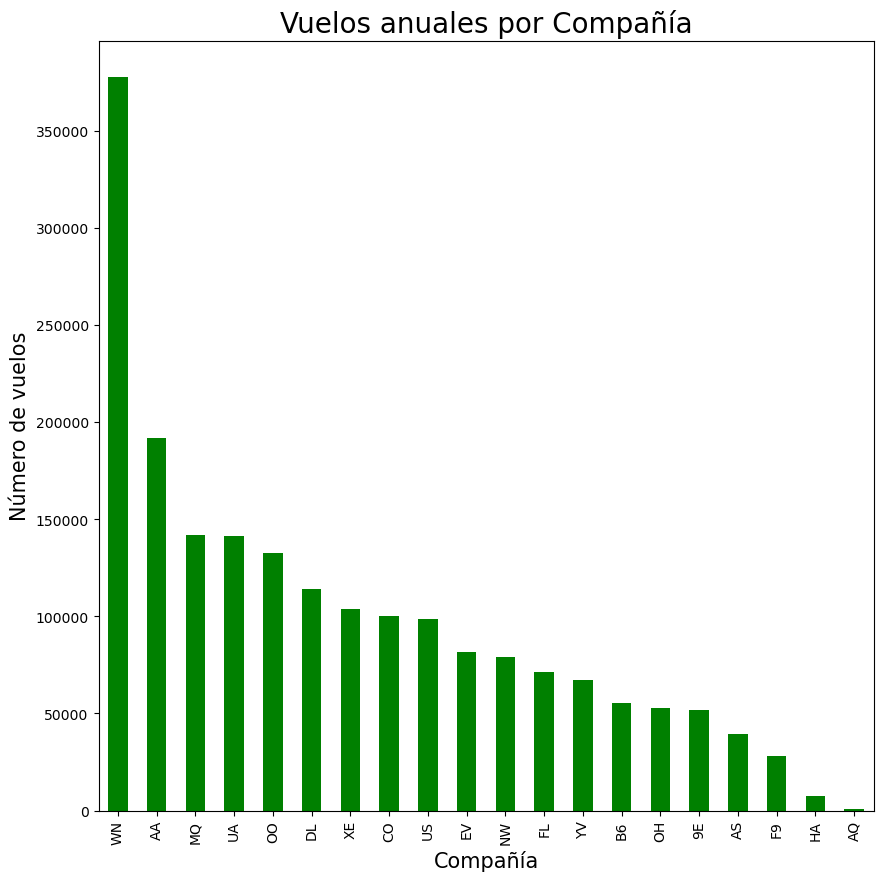

In [31]:
#según la web data-to-viz, para 1 variable categórica las opciones de visualización son:
#barplot, lollipop, waffle, world cloud, doughnut, pie, treemap y circular packing

plt.style.use("default")
#aplica el estilo seleccionado default

figCarrier, ax = plt.subplots(figsize = (10,10))
#genera una figura y sus ejes tamaño 10x10

df_flight["UniqueCarrier"].value_counts().plot(kind='bar', color="green") 
#dibuja figura barplot a partir de la cantidad de vuelos por compañía

ax.set_xlabel('Compañía', fontsize=15) 
#asigna la etiqueta al eje X con tamaño letra
ax.set_ylabel('Número de vuelos', fontsize=15) 
#asigna la etiqueta al eje Y con tamaño letra
ax.set_title("Vuelos anuales por Compañía", fontsize=20) 
#asigna el título con tamaño letra



#### Crea almenys una visualització per una variable numèrica (ArrDelay)

Text(0, 0.5, 'Número de retrasos')

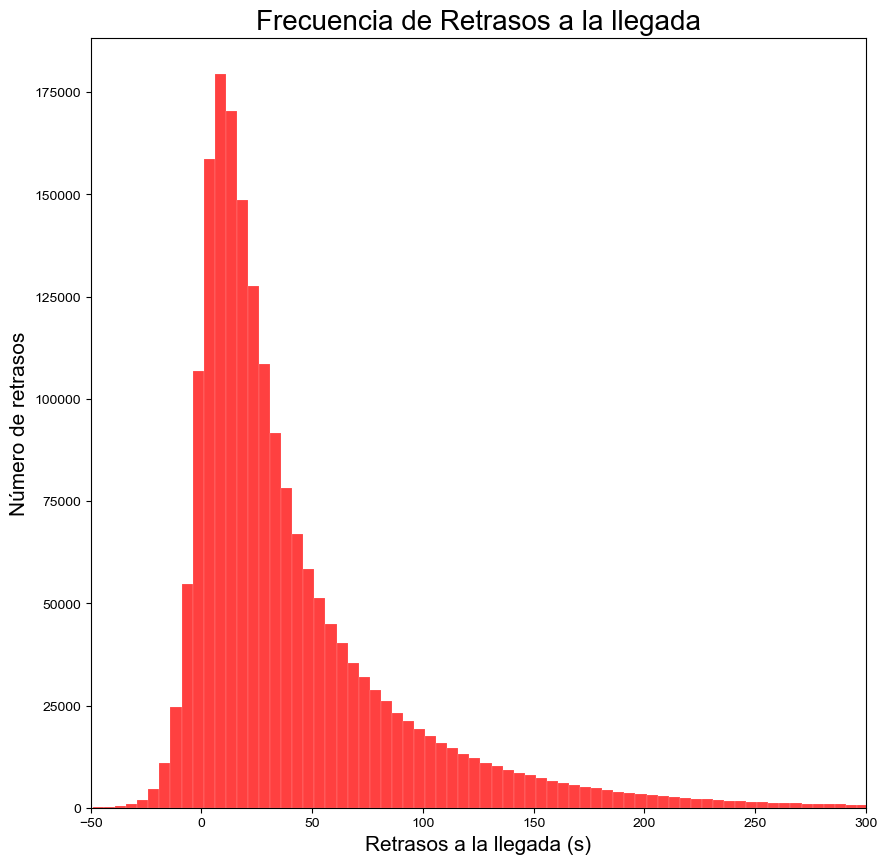

In [32]:
#según la web data-to-viz, para 1 variable numérica las opciones de visualización son:
#histogram, densityplot

figDelay, ax = plt.subplots(figsize=(10,10))
#genera una figura y sus ejes tamaño 10x10

sns.set_style("whitegrid")
#aplica estilo seaborn

sns.histplot(data=df_flight, x="ArrDelay", color="red", binwidth=5)
#se introduce la fuente de datos y la variable x
#el parámetro color y bindwidth que es el ancho de barra

plt.xlim(-50,300)
#limita la grafica desde -50 s hasta 300 s
#a partir de 300 s los registros son casi inexistentes

ax.set_title("Frecuencia de Retrasos a la llegada", fontsize=20)
#asigna la etiqueta al eje X con tamaño letra
ax.set_xlabel("Retrasos a la llegada (s)", fontsize=15)
#asigna la etiqueta al eje X con tamaño letra
ax.set_ylabel("Número de retrasos", fontsize=15)
#asigna la etiqueta al eje X con tamaño letra



#### Crea almenys una visualització per una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

Text(0.5, 0, 'Compañía')

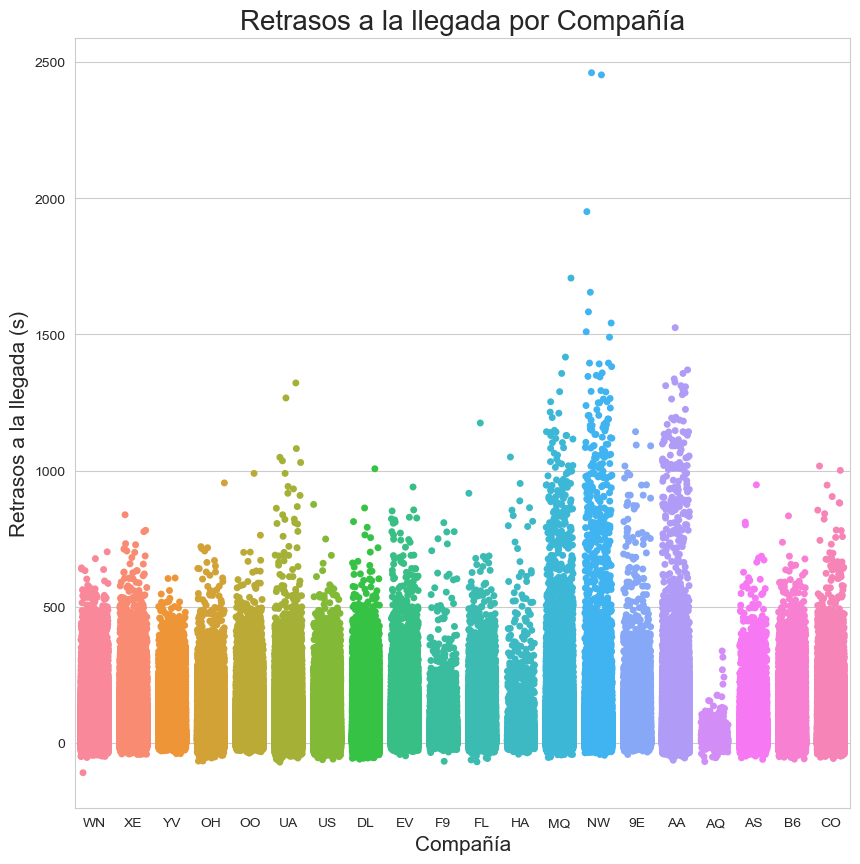

In [33]:
#según la web data-to-viz, para 1 variable numérica y 1 categórica (varias observaciones) las opciones de visualización son:
#boxplot, violin, ridge line, density, histogram
#seaborn tiene dos gráficas para variables categóricas: scatterplot y stripplot
#debido a que el dataset es enorme, finalmente se utilizará el stripplot

figDelayCarrier, ax = plt.subplots(figsize=(10,10))
#genera una figura y sus ejes tamaño 10x10

sns.set_style("whitegrid")
#aplica estilo seaborn

sns.stripplot(data=df_flight, x="UniqueCarrier", y="ArrDelay", jitter=0.35)
#se introduce la fuente de datos y la variable x e y
#se introduce parámetro ancho de barra

ax.set_title("Retrasos a la llegada por Compañía", fontsize=20)
#asigna la etiqueta al eje X con tamaño letra
ax.set_ylabel("Retrasos a la llegada (s)", fontsize=15)
#asigna la etiqueta al eje X con tamaño letra
ax.set_xlabel("Compañía", fontsize=15)
#asigna la etiqueta al eje X con tamaño letra




#### Crea almenys una visualització per dues variables numèriques (ArrDelay i DepDelay)

Text(0, 0.5, 'Retrasos a la salida (s)')

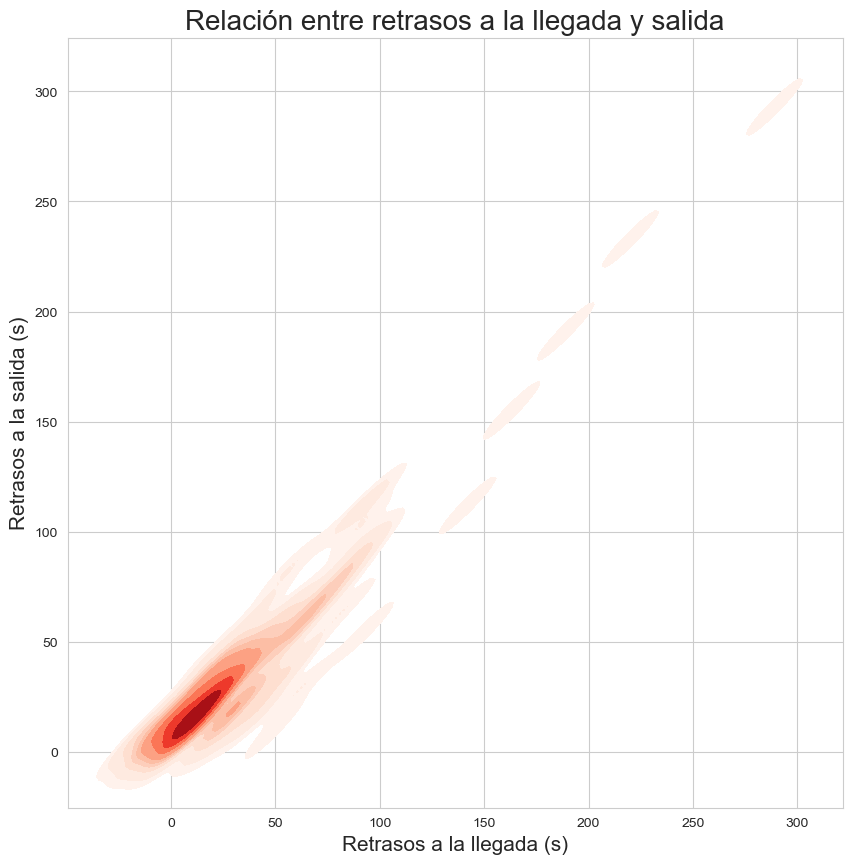

In [34]:
#según la web data-to-viz, para 2 variables numéricas no ordenadas y muchos puntos,
#las opciones de visualización son:
# violinplot, density plot, scatter with marginal point, 2d density plot
#seaborn tiene la opción del contour plot a partir del kernel density plot
#finalmente se utilizará el kernel density plot con contour plot porque muestra de forma más clara la relación entre variables

figArrDepDelay, ax = plt.subplots(figsize=(10,10))
#genera una figura y sus ejes tamaño 10x10

sns.set_theme()
#aplica estilo seaborn

df_arrdel_sample = df_flight["ArrDelay"].sample(n=15000)
df_depdel_sample = df_flight["DepDelay"].sample(n=15000)
#se aplica un sample de 15000 muestras aleatorias para aumentar la rapidez del dibujado

sns.kdeplot(x=df_arrdel_sample, y=df_depdel_sample, cmap="Reds", shade=True, bw_adjust=0.5)
#se introduce la fuente de datos y la variable x e y
#se introduce los parámetros que definen el color, la sombra y el ancho de banda

ax.set_title("Relación entre retrasos a la llegada y salida", fontsize=20)
#asigna la etiqueta al eje X con tamaño letra
ax.set_xlabel("Retrasos a la llegada (s)", fontsize=15)
#asigna la etiqueta al eje X con tamaño letra
ax.set_ylabel("Retrasos a la salida (s)", fontsize=15)
#asigna la etiqueta al eje X con tamaño letra



#### Crea almenys una visualització per tres variables (ArrDelay, DepDelay i UniqueCarrier)

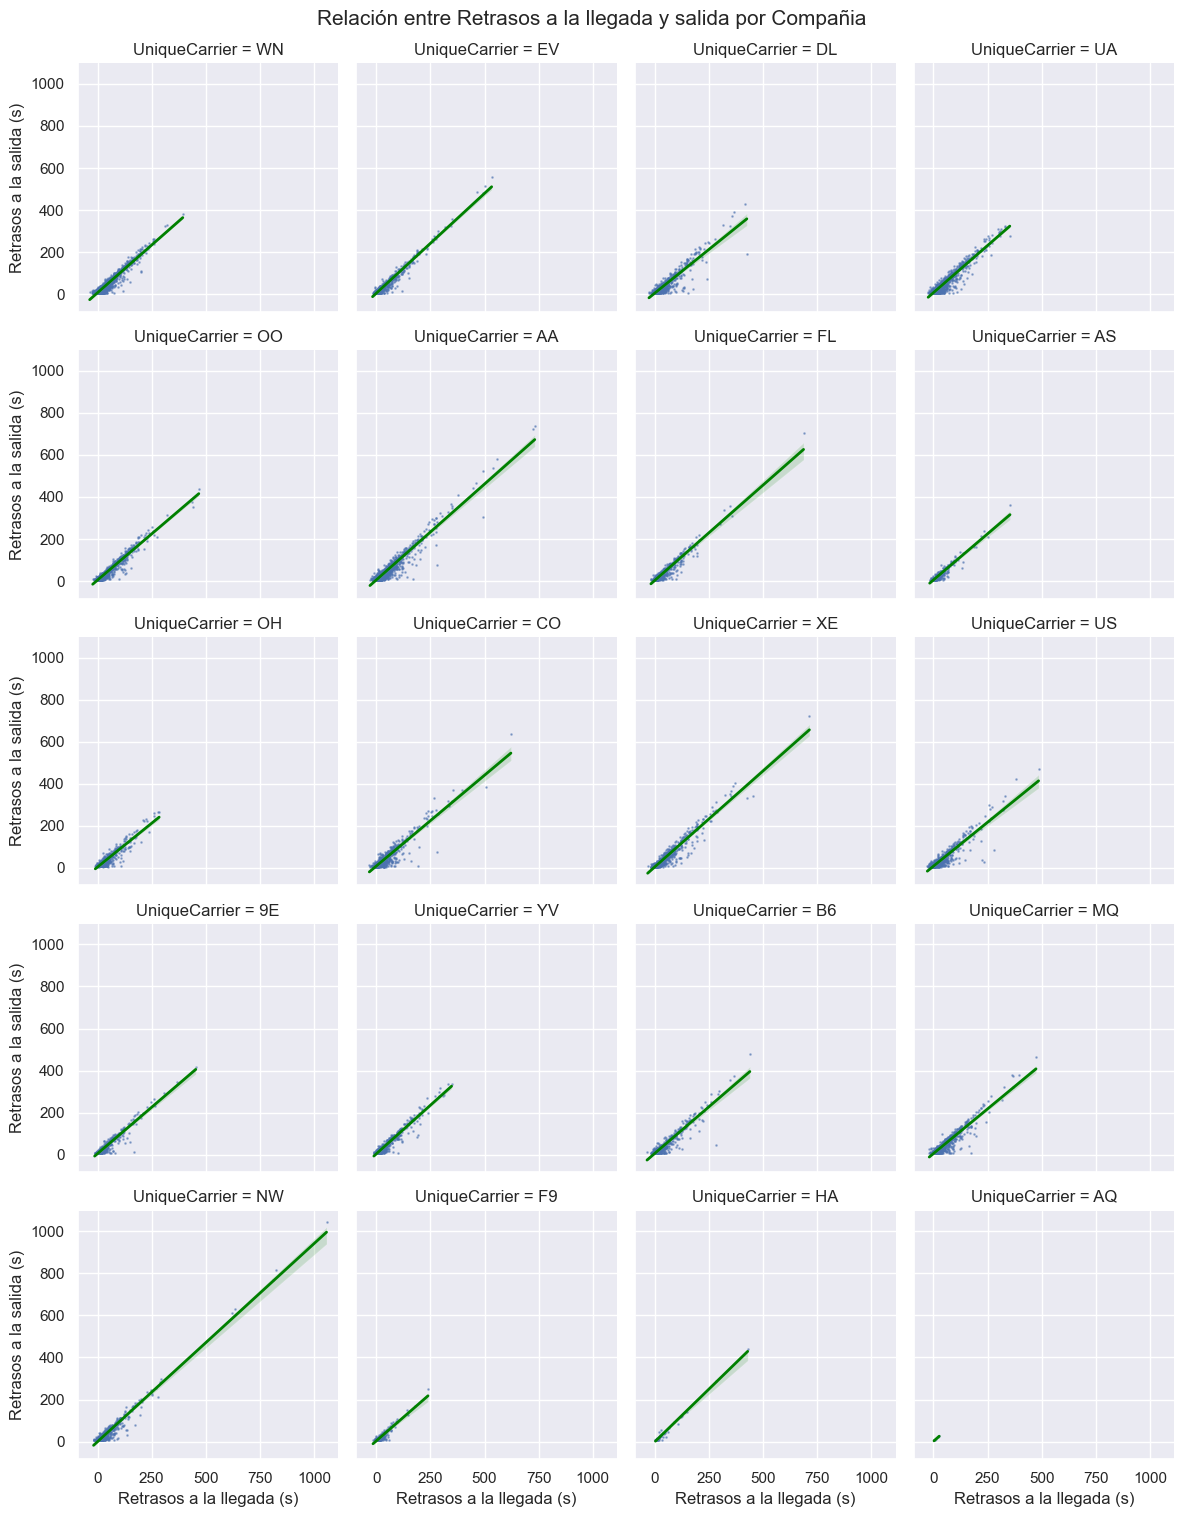

In [35]:
#según la web data-to-viz, para 3 variables, 2 numéricas y 1 categórica, sin orden,
#las opciones de visualización son:
#grouped scatter, 2d density, boxplot, violin, pca, correlogram
#se utilizará la gráfica lmplot que muestra la relación entre dos variables por regresión lineal 

df_flight_sample=df_flight.sample(15000)
#se toma un sample para acelerar el dibujado y evitar el overplotting

figDepArrCarrier = sns.lmplot(x="ArrDelay", y="DepDelay", col="UniqueCarrier", data=df_flight_sample, col_wrap=4, height=3, scatter_kws={'s': 0.8, 'alpha': 0.5}, 
           line_kws={'lw': 2, 'color': 'green'})
#dibuja el análisis de regresión para cada compañía, si se hiciera todo junto hay overplotting que no deja ver nada
#con scatter_kws y line_kws se introducen parámetros para disminuir el tamaño del punto y evitar el overplotting y definir la linea de regresión

figDepArrCarrier.fig.suptitle('Relación entre Retrasos a la llegada y salida por Compañia', fontsize=15, y=1.01)
#se define el título superior para la gráfica
figDepArrCarrier.set_axis_labels("Retrasos a la llegada (s)", "Retrasos a la salida (s)")
#se define el título para los ejes


#### Crea almenys una visualització per més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

Text(0, 0.5, 'Retrasos a la salida (s)')

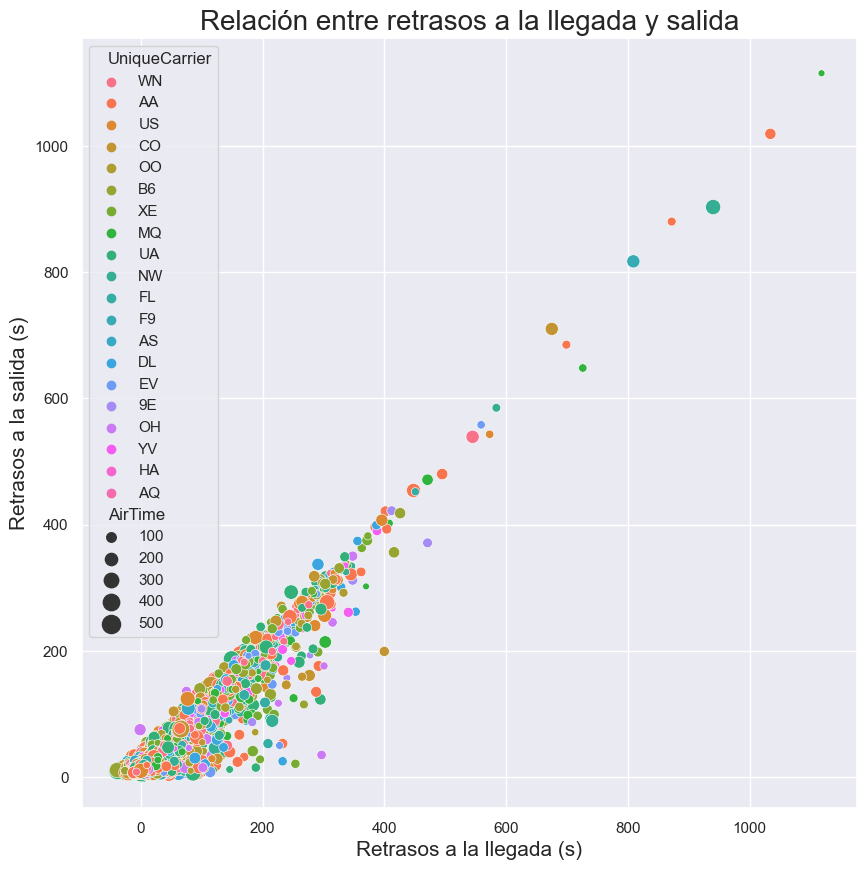

In [36]:
#según la web data-to-viz, para 4 variables, 3 numéricas y 1 categórica, sin orden,
#las opciones de visualización son:
#grouped scatter, 2d density, boxplot, violin, pca, correlogram
#se utilizará la gráfica scatter 

figDepArrAirCarrier, ax = plt.subplots(figsize=(10,10))
#genera una figura y sus ejes tamaño 10x10

df_flight_sample=df_flight.sample(15000)
#se toma un sample para acelerar el dibujado y evitar el overplotting

figDepArrAirCarrier = sns.scatterplot(data=df_flight_sample, x="ArrDelay", y="DepDelay", size="AirTime", sizes=(20,200), hue="UniqueCarrier")

ax.set_title("Relación entre retrasos a la llegada y salida", fontsize=20)
#asigna la etiqueta al eje X con tamaño letra
ax.set_xlabel("Retrasos a la llegada (s)", fontsize=15)
#asigna la etiqueta al eje X con tamaño letra
ax.set_ylabel("Retrasos a la salida (s)", fontsize=15)
#asigna la etiqueta al eje X con tamaño letra

### Exercici 2
#### Exporta els gràfics com imatges o com html

In [38]:
figCarrier.savefig("fig01.png")
figDelay.savefig("fig02.png")
figDelayCarrier.savefig("fig03.png")
figArrDepDelay.savefig("fig04.png")
figDepArrCarrier.savefig("fig05.png")
figDepArrAirCarrier.figure.savefig("fig06.png")
#la fig06 al tratarse de un objeto 'AxesSubplot' se ha de añadir el metodo figure

### Exercici 3
#### Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3

In [ ]:
#se ha actualizado la S03T05 con las visualizaciones gráficas